In [8]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [9]:
# 参数设置
theta_deg = 120  # 开角（度）
alpha_deg = 1.5  # 坡度（度）
D0 = 70  # 中心深度（米）
d = 200  # 测线间距（米）
d_range = np.arange(-800, 801, d)  # 沿测线距离（米）
print(
    f"参数设置:\n开角 θ: {theta_deg}°\n"
    f"坡度 α: {alpha_deg}°\n"
	f"中心深度 D0: {D0} 米\n"
    f"测线间距 d: {d} 米\n"
	f"沿测线距离范围: {d_range} 米\n"
)

theta = np.radians(theta_deg)  # 转换为弧度
alpha = np.radians(alpha_deg)  # 转换为弧度

D = D0 - d_range * np.tan(alpha)  # 水的深度（米）
print(f"计算得到的深度 D:\n{D}")

参数设置:
开角 θ: 120°
坡度 α: 1.5°
中心深度 D0: 70 米
测线间距 d: 200 米
沿测线距离范围: [-800 -600 -400 -200    0  200  400  600  800] 米

计算得到的深度 D:
[90.94873726 85.71155294 80.47436863 75.23718431 70.         64.76281569
 59.52563137 54.28844706 49.05126274]


In [10]:
# 覆盖宽度
W_left = D * np.sin(theta / 2) / np.cos(theta / 2 + alpha)
W_right = D * np.sin(theta / 2) / np.cos(theta / 2 - alpha)
W = W_left + W_right  # 总覆盖宽度（米）
print(f"计算得到的覆盖宽度 W:\n{W}")

计算得到的覆盖宽度 W:
[315.81332829 297.62756059 279.44179288 261.25602517 243.07025746
 224.88448975 206.69872205 188.51295434 170.32718663]


In [11]:
# 计算重叠率
# 对于每对相邻测线（x_i, x_{i+1}），第1条的右宽度+第2条的左宽度
W1r = W_right[:-1]    # 第i条右宽度
W2l = W_left[1:]      # 第i+1条左宽度
overlap = 1 - d / ((W1r + W2l) * np.cos(alpha))  # 重叠率

print(f"计算得到的重叠率:\n{overlap}")


计算得到的重叠率:
[ 0.34683868  0.3056123   0.25883102  0.20529105  0.14341365  0.07108689
 -0.01458026 -0.11765362]


In [12]:
data = {
    'D': D,
    'W_left': W_left,
    'W_right': W_right,
    'W_total': W,
    'overlap': np.append(np.nan, overlap) * 100  # 重叠率转换为百分比
}

df = pd.DataFrame(data, index=d_range).T
df.columns = d_range
df.columns.name = "d_range"
df
df.style.format("{:.2f}")

# 保存结果到CSV文件
output_file = "result1.xlsx"
df.to_excel(output_file, index=True)
print(f"结果已保存到 {output_file}")


d_range,-800,-600,-400,-200,0,200,400,600,800
D,90.948737,85.711553,80.474369,75.237184,70.000000,64.762816,59.525631,54.288447,49.051263
W_left,165.068576,155.563281,146.057986,136.552691,127.047397,117.542102,108.036807,98.531512,89.026218
W_right,150.744753,142.064280,133.383807,124.703334,116.022861,107.342388,98.661915,89.981442,81.300969
W_total,315.813328,297.627561,279.441793,261.256025,243.070257,224.884490,206.698722,188.512954,170.327187
overlap,NaN,34.683868,30.561230,25.883102,20.529105,14.341365,7.108689,-1.458026,-11.765362


d_range,-800,-600,-400,-200,0,200,400,600,800
D,90.95,85.71,80.47,75.24,70.00,64.76,59.53,54.29,49.05
W_left,165.07,155.56,146.06,136.55,127.05,117.54,108.04,98.53,89.03
W_right,150.74,142.06,133.38,124.70,116.02,107.34,98.66,89.98,81.30
W_total,315.81,297.63,279.44,261.26,243.07,224.88,206.70,188.51,170.33
overlap,nan,34.68,30.56,25.88,20.53,14.34,7.11,-1.46,-11.77


结果已保存到 result1.xlsx


Text(0, 0.5, 'Depth / Width (m)')

Text(0.5, 1.0, 'Depth and Coverage Width vs Distance')

Text(0, 0.5, 'Overlap (%)')

Text(0.5, 0, 'Distance from Center (m)')

Text(0.5, 1.0, 'Overlap Ratio vs Distance')

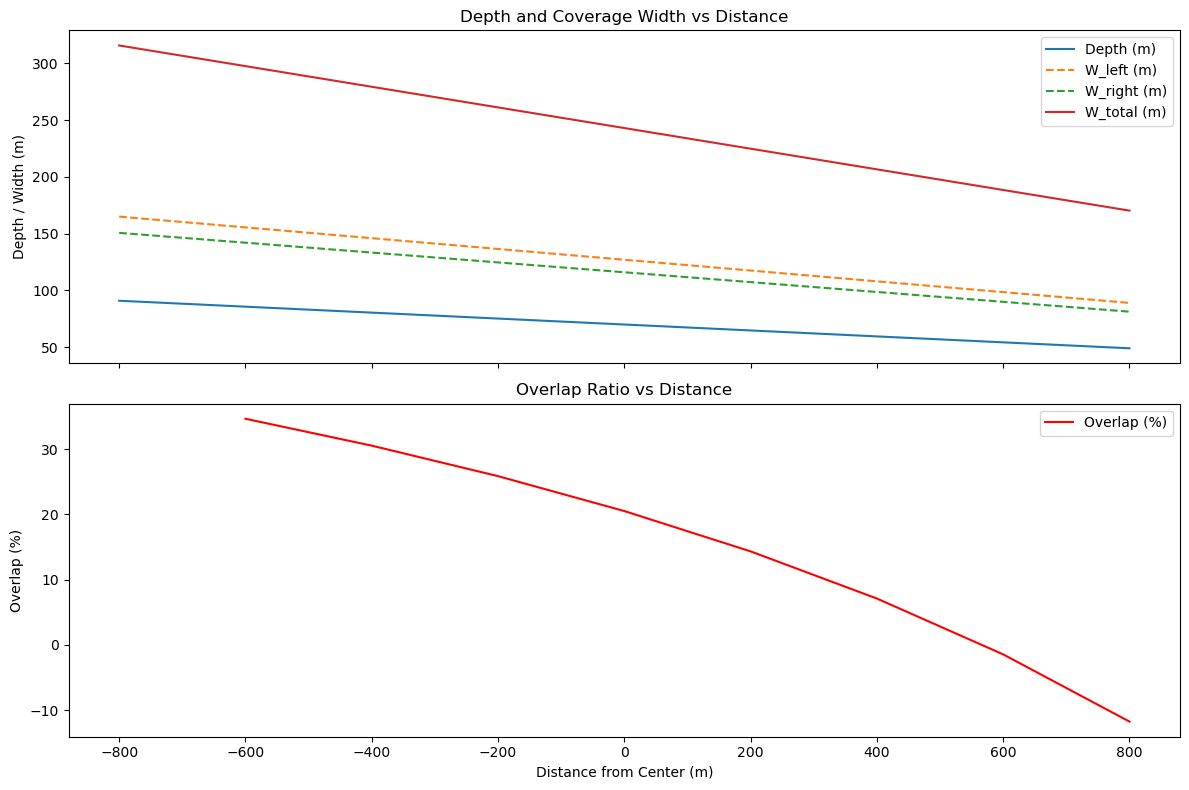

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1. 水深和条带宽度
axes[0].plot(df.columns, df.loc['D'], label='Depth (m)')
axes[0].plot(df.columns, df.loc['W_left'], label='W_left (m)', linestyle='--')
axes[0].plot(df.columns, df.loc['W_right'], label='W_right (m)', linestyle='--')
axes[0].plot(df.columns, df.loc['W_total'], label='W_total (m)', linestyle='-')
axes[0].set_ylabel('Depth / Width (m)')
axes[0].legend()
axes[0].set_title('Depth and Coverage Width vs Distance')

# 2. 重叠率
axes[1].plot(df.columns, df.loc['overlap'], label='Overlap (%)', color='r')
axes[1].set_ylabel('Overlap (%)')
axes[1].set_xlabel('Distance from Center (m)')
axes[1].legend()
axes[1].set_title('Overlap Ratio vs Distance')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Total Coverage Width (m)')

Text(0, 0.5, 'Overlap (%)')

Text(0.5, 0, 'Distance from Center (m)')

Text(0.5, 1.0, 'Coverage Width and Overlap vs Distance')

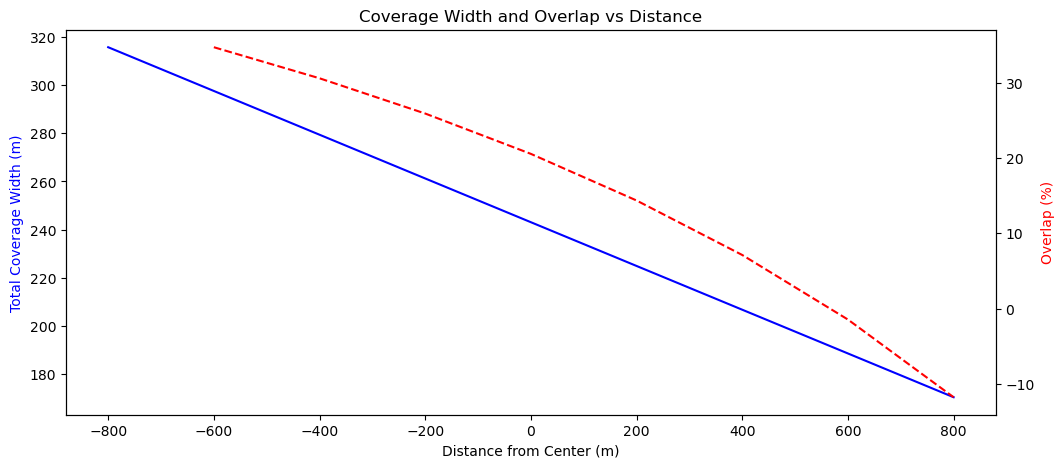

In [14]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(df.columns, df.loc['W_total'], 'b-', label='W_total (m)')
ax1.set_ylabel('Total Coverage Width (m)', color='b')
ax2 = ax1.twinx()
ax2.plot(df.columns, df.loc['overlap'], 'r--', label='Overlap (%)')
ax2.set_ylabel('Overlap (%)', color='r')
ax1.set_xlabel('Distance from Center (m)')
plt.title('Coverage Width and Overlap vs Distance')
plt.show()
